In [ ]:
import os
os.environ["KAGGLE_CONFIG_DIR"]="/content"


In [ ]:
!kaggle datasets download -d altruistdelhite04/loan-prediction-problem-dataset

In [ ]:
!unzip \*.zip && rm *.zip

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
os.rename("train_u6lujuX_CVtuZ9i.csv","train.csv")
os.rename("test_Y3wMUE5_7gLdaTN.csv","test.csv")

In [149]:
train=pd.read_csv("train_.csv")
test=pd.read_csv("test_.csv")

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [150]:
train["Credit_History"].unique()

array([ 1.,  0., nan])

In [151]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [152]:
train_drop=train.drop("Loan_Status",axis=1)
df=pd.concat([train_drop,test],axis=0)
df.shape

(981, 12)

In [153]:
df["Loan_status"]=train["Loan_Status"]
df.shape

(981, 13)

In [19]:
df["New_Index"]=range(0,df.shape[0])


In [20]:
df.set_index("New_Index",inplace=True)

Check if there is any missing value in any column

In [21]:
df.isnull().mean()

Loan_ID              0.000000
Gender               0.024465
Married              0.003058
Dependents           0.025484
Education            0.000000
Self_Employed        0.056065
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.027523
Loan_Amount_Term     0.020387
Credit_History       0.080530
Property_Area        0.000000
Loan_status          0.000000
dtype: float64

In [22]:
print(df.index.duplicated().sum())
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
df

0
0


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_status
New_Index,,,,,,,,,,,,,
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_status        981 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 139.6+ KB


In [24]:
df.nunique()

Loan_ID              981
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      752
CoapplicantIncome    437
LoanAmount           232
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
Loan_status            2
dtype: int64

In [25]:
for col in df.columns:
  if(df[col].dtype=="object"):
    print(f"categories in {col} :{df[col].unique()}")

categories in Loan_ID :['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP00

Dropping unnecesary columns-> Loan_ID

In [26]:
df.drop("Loan_ID", inplace=True, axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_status
New_Index,,,,,,,,,,,,
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
976,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
977,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
978,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y


In [27]:
df["Total_Income"]=df["ApplicantIncome"]+df["CoapplicantIncome"]

In [28]:
df["Average_income"]=df["Total_Income"]/2
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_status,Total_Income,Average_income
New_Index,,,,,,,,,,,,,,
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,2924.5
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,3045.5
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,1500.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,2470.5
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,3000.0


In [29]:
df.describe().style.background_gradient(cmap="cubehelix")

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Average_income
count,981.000000,981.000000,954.000000,961.000000,902.000000,981.000000,981.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920,6781.711437,3390.855719
std,5695.104533,2718.772806,77.421743,65.100602,0.370553,6023.952550,3011.976275
min,0.000000,0.000000,9.000000,6.000000,0.000000,1442.000000,721.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000,4166.000000,2083.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000,5314.000000,2657.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000,7308.000000,3654.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,81000.000000,40500.000000


**Now Let's Start Visualizing the data:**

<Figure size 1000x600 with 0 Axes>

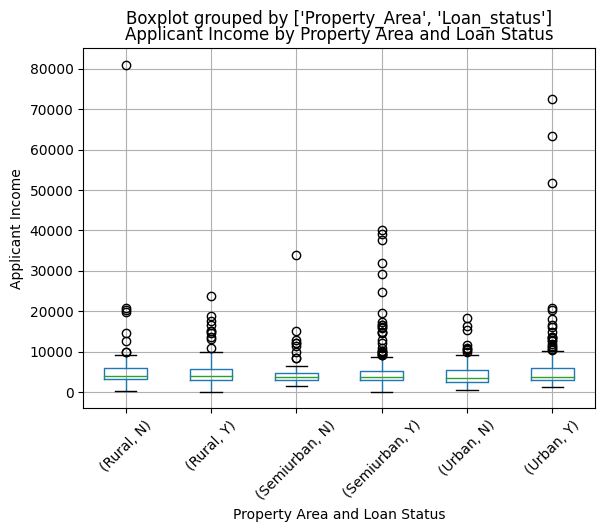

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

df.boxplot(column='ApplicantIncome', by=['Property_Area', 'Loan_status'])
plt.xlabel('Property Area and Loan Status')
plt.ylabel('Applicant Income')
plt.title('Applicant Income by Property Area and Loan Status')
_ = plt.xticks(rotation=45)

**Here I have forgewt to plot for loan approval rate by credit terms**

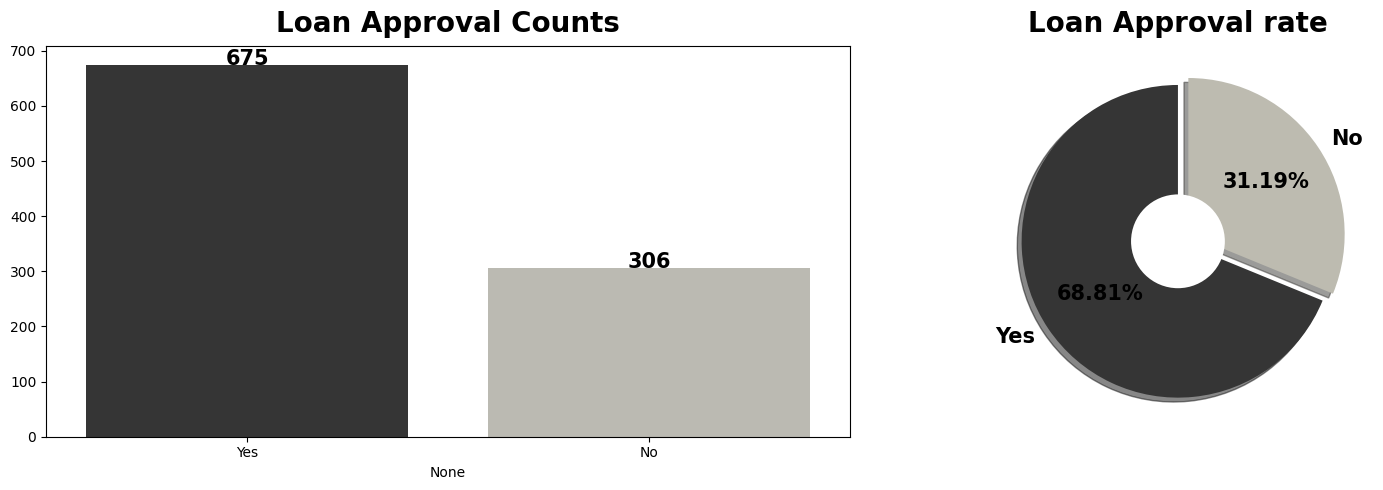

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.title("Loan Approval Counts", fontweight="bold",size=20,pad=10)
Loan_approval=df["Loan_status"].value_counts()
index_values=["Yes","No"]
Loan_approval=Loan_approval.set_axis(index_values)
sns.barplot(x=Loan_approval.index, y=Loan_approval.values,palette=["#353535","#BDBBB0"] )
for i,v in enumerate(Loan_approval.values):
  plt.text(i,v,str(v),ha="center",fontweight="black",size=15)

plt.subplot(1,2,2)
plt.title("Loan Approval rate", fontweight="bold",size=20,pad=10)
plt.pie(Loan_approval,labels=Loan_approval.index,autopct="%1.2f%%", colors=["#353535","#BDBBB0"],explode=[0,0.08],startangle=90,textprops={"fontweight":"black", "size":15},shadow=True)
center_circle=plt.Circle((0,0),0.3,fc="white")
fig=plt.gcf()
fig.gca().add_artist(center_circle)

plt.tight_layout()
plt.show()

From this we can say that in most of the cases the chance of getting the loan approved is higher than getting rejected, thereFore there is a imbalance in the DataSet , During Model training We need to fix this problem

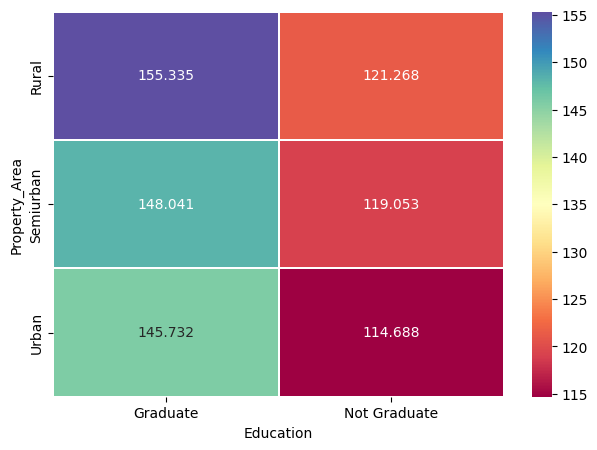

In [ ]:
fig=plt.figure(figsize=(16,5))
gs=fig.add_gridspec(1,2,width_ratios=[1,1])


ax1=fig.add_subplot(gs[0,0])
x=df.pivot_table(index="Property_Area", columns="Education",values="LoanAmount", aggfunc="mean")
sns.heatmap(x,linewidths=0.2,annot=True,fmt=".3f",cmap="Spectral")



plt.show()

From this above visualization we conclude that the Loan amount of Graduate people is of course higher than Not graduate People But another thing to notice is that Semiurban people is higher than urban People and rural people, That's Semiurban People loan demand is more than  others

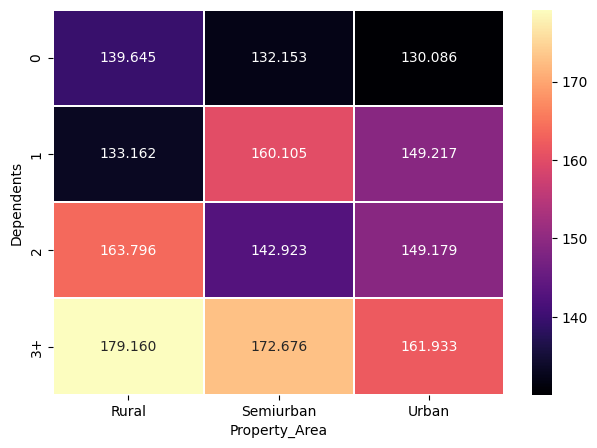

In [ ]:
fig=plt.figure(figsize=(16,5))
gs=fig.add_gridspec(1,2,width_ratios=[1,1])


ax1=fig.add_subplot(gs[0,0])
y=df.pivot_table(index="Dependents", columns="Property_Area",values="LoanAmount", aggfunc="mean")
sns.heatmap(y,linewidths=0.2,annot=True,fmt=".3f",cmap="magma")


plt.show()

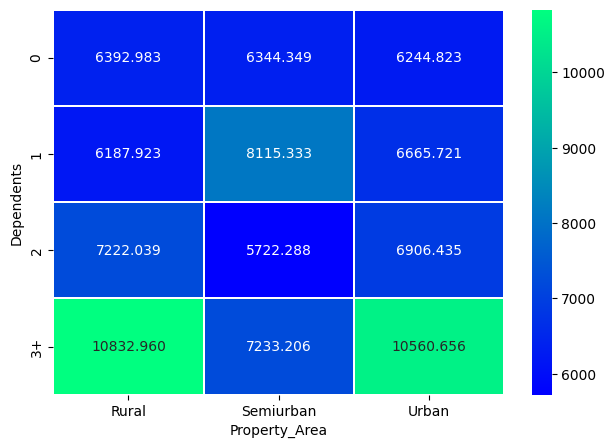

In [ ]:
fig=plt.figure(figsize=(16,5))
gs=fig.add_gridspec(1,2,width_ratios=[1,1])


ax1=fig.add_subplot(gs[0,0])
y=df.pivot_table(index="Dependents", columns="Property_Area",values="Total_Income", aggfunc="mean")
sns.heatmap(y,linewidths=0.2,annot=True,fmt=".3f",cmap="winter")



plt.show()

In [ ]:
print(df["Dependents"].value_counts())

for i in df["Dependents"].unique():
  print(df[df["Dependents"]==i]["Total_Income"].mean())


Dependents
0     545
1     160
2     160
3+     91
Name: count, dtype: int64
6326.644256882276
7092.8625
6622.1862499237495
9392.241758241758
nan


In [ ]:
print(df["Property_Area"].value_counts())

for i in df["Property_Area"].unique():
  print(df[df["Property_Area"]==i]["Total_Income"].mean())

Property_Area
Semiurban    349
Urban        342
Rural        290
Name: count, dtype: int64
6825.271344993567
6931.531448278758
6614.532951289399


**Now we will analyze the Loan Approval Rate with respect to the column Gender**

In [ ]:
df["Credit_History"].value_counts()

Credit_History
1.0    754
0.0    148
Name: count, dtype: int64

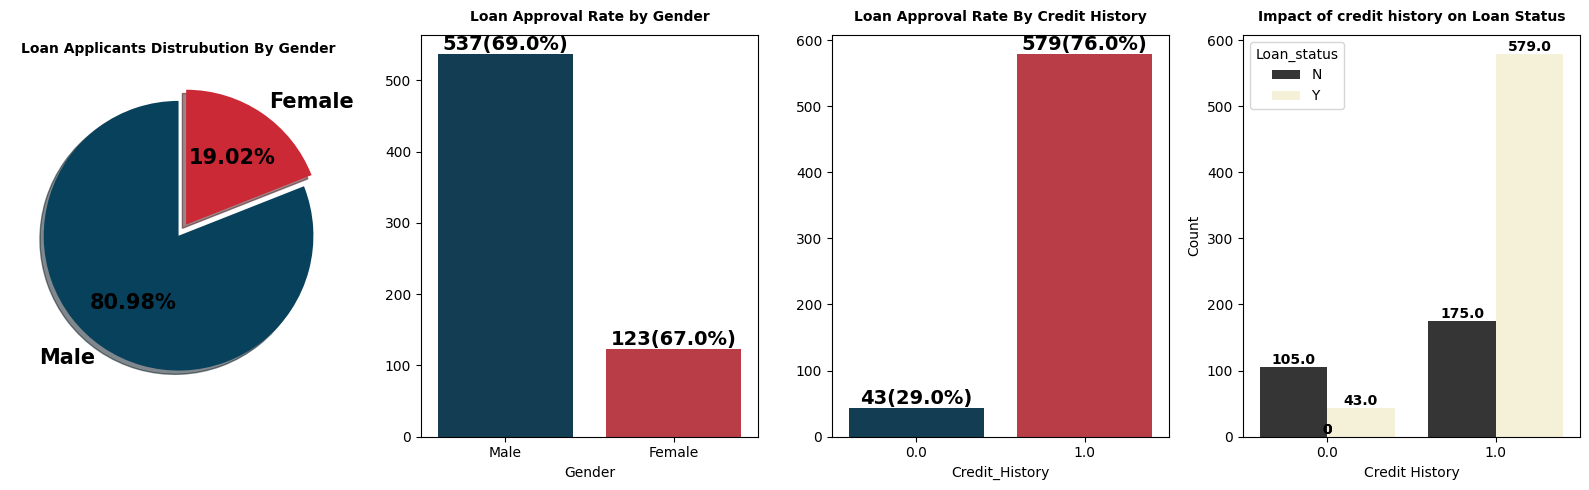

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,4,1)
plt.title("Loan Applicants Distrubution By Gender", fontweight="heavy", size=10, pad=10)
plt.pie(df["Gender"].value_counts(),labels=df["Gender"].value_counts().index, autopct="%.2f%%",textprops={"fontweight":"heavy","size":15},shadow=True,colors=["#08415C","#CC2936"],explode=[0,0.1],startangle=90)

plt.subplot(1,4,2)
plt.title("Loan Approval Rate by Gender",fontweight="heavy", size=10,pad=10)
approve_df=df[df["Loan_status"]=="Y"]
gender_value_Approve=approve_df["Gender"].value_counts()
actual_gender_value=df["Gender"].value_counts()
approval_rate=np.floor((gender_value_Approve/actual_gender_value)*100).values
sns.barplot(x=gender_value_Approve.index,y=gender_value_Approve.values,palette=["#08415C","#CC2936"])
for i,v in enumerate(gender_value_Approve.values):
  plt.text(i,v,str(v)+"("+str(approval_rate[i])+"%)",ha="center",va="bottom",fontweight="heavy",size=14)


plt.subplot(1,4,3)
plt.title("Loan Approval Rate By Credit History",fontweight="heavy",size=10,pad=10)
approve_df_credit=df[df["Loan_status"]=="Y"]
credit_Approve=approve_df_credit["Credit_History"].value_counts().sort_index()
credit_value=df["Credit_History"].value_counts().sort_index()
credit_rate=np.floor((credit_Approve/credit_value)*100).values
sns.barplot(x=credit_Approve.index,y=credit_Approve.values,palette=["#08415C","#CC2936"])
for i,v in enumerate(credit_Approve.values):
  plt.text(i,v,str(v)+"("+str(credit_rate[i])+"%)",ha="center",va="bottom",fontweight="heavy",size=14)


plt.subplot(1,4,4)
sns.countplot(x="Credit_History", hue="Loan_status", data=df, palette=["#353535", "#FAF4D3"])
plt.title("Impact of credit history on Loan Status", fontweight="bold", size=10, pad=10)
plt.xlabel("Credit History")
plt.ylabel("Count")
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom', fontweight='heavy', size=10)

plt.tight_layout()
plt.show()


1.From this Visualization we can see that **The number of Male** Loan Applicant is **Much Higher** than the number of **Female Loan Applicant**

2.But we can see that the approval rate of Female Loan applicant is **Much Closer** to Male Loan applicant

3.We also can that The cahnce of getting the **loan approved is higher** for those who have **credit History 1.0**

**Plotting the Pair plot**

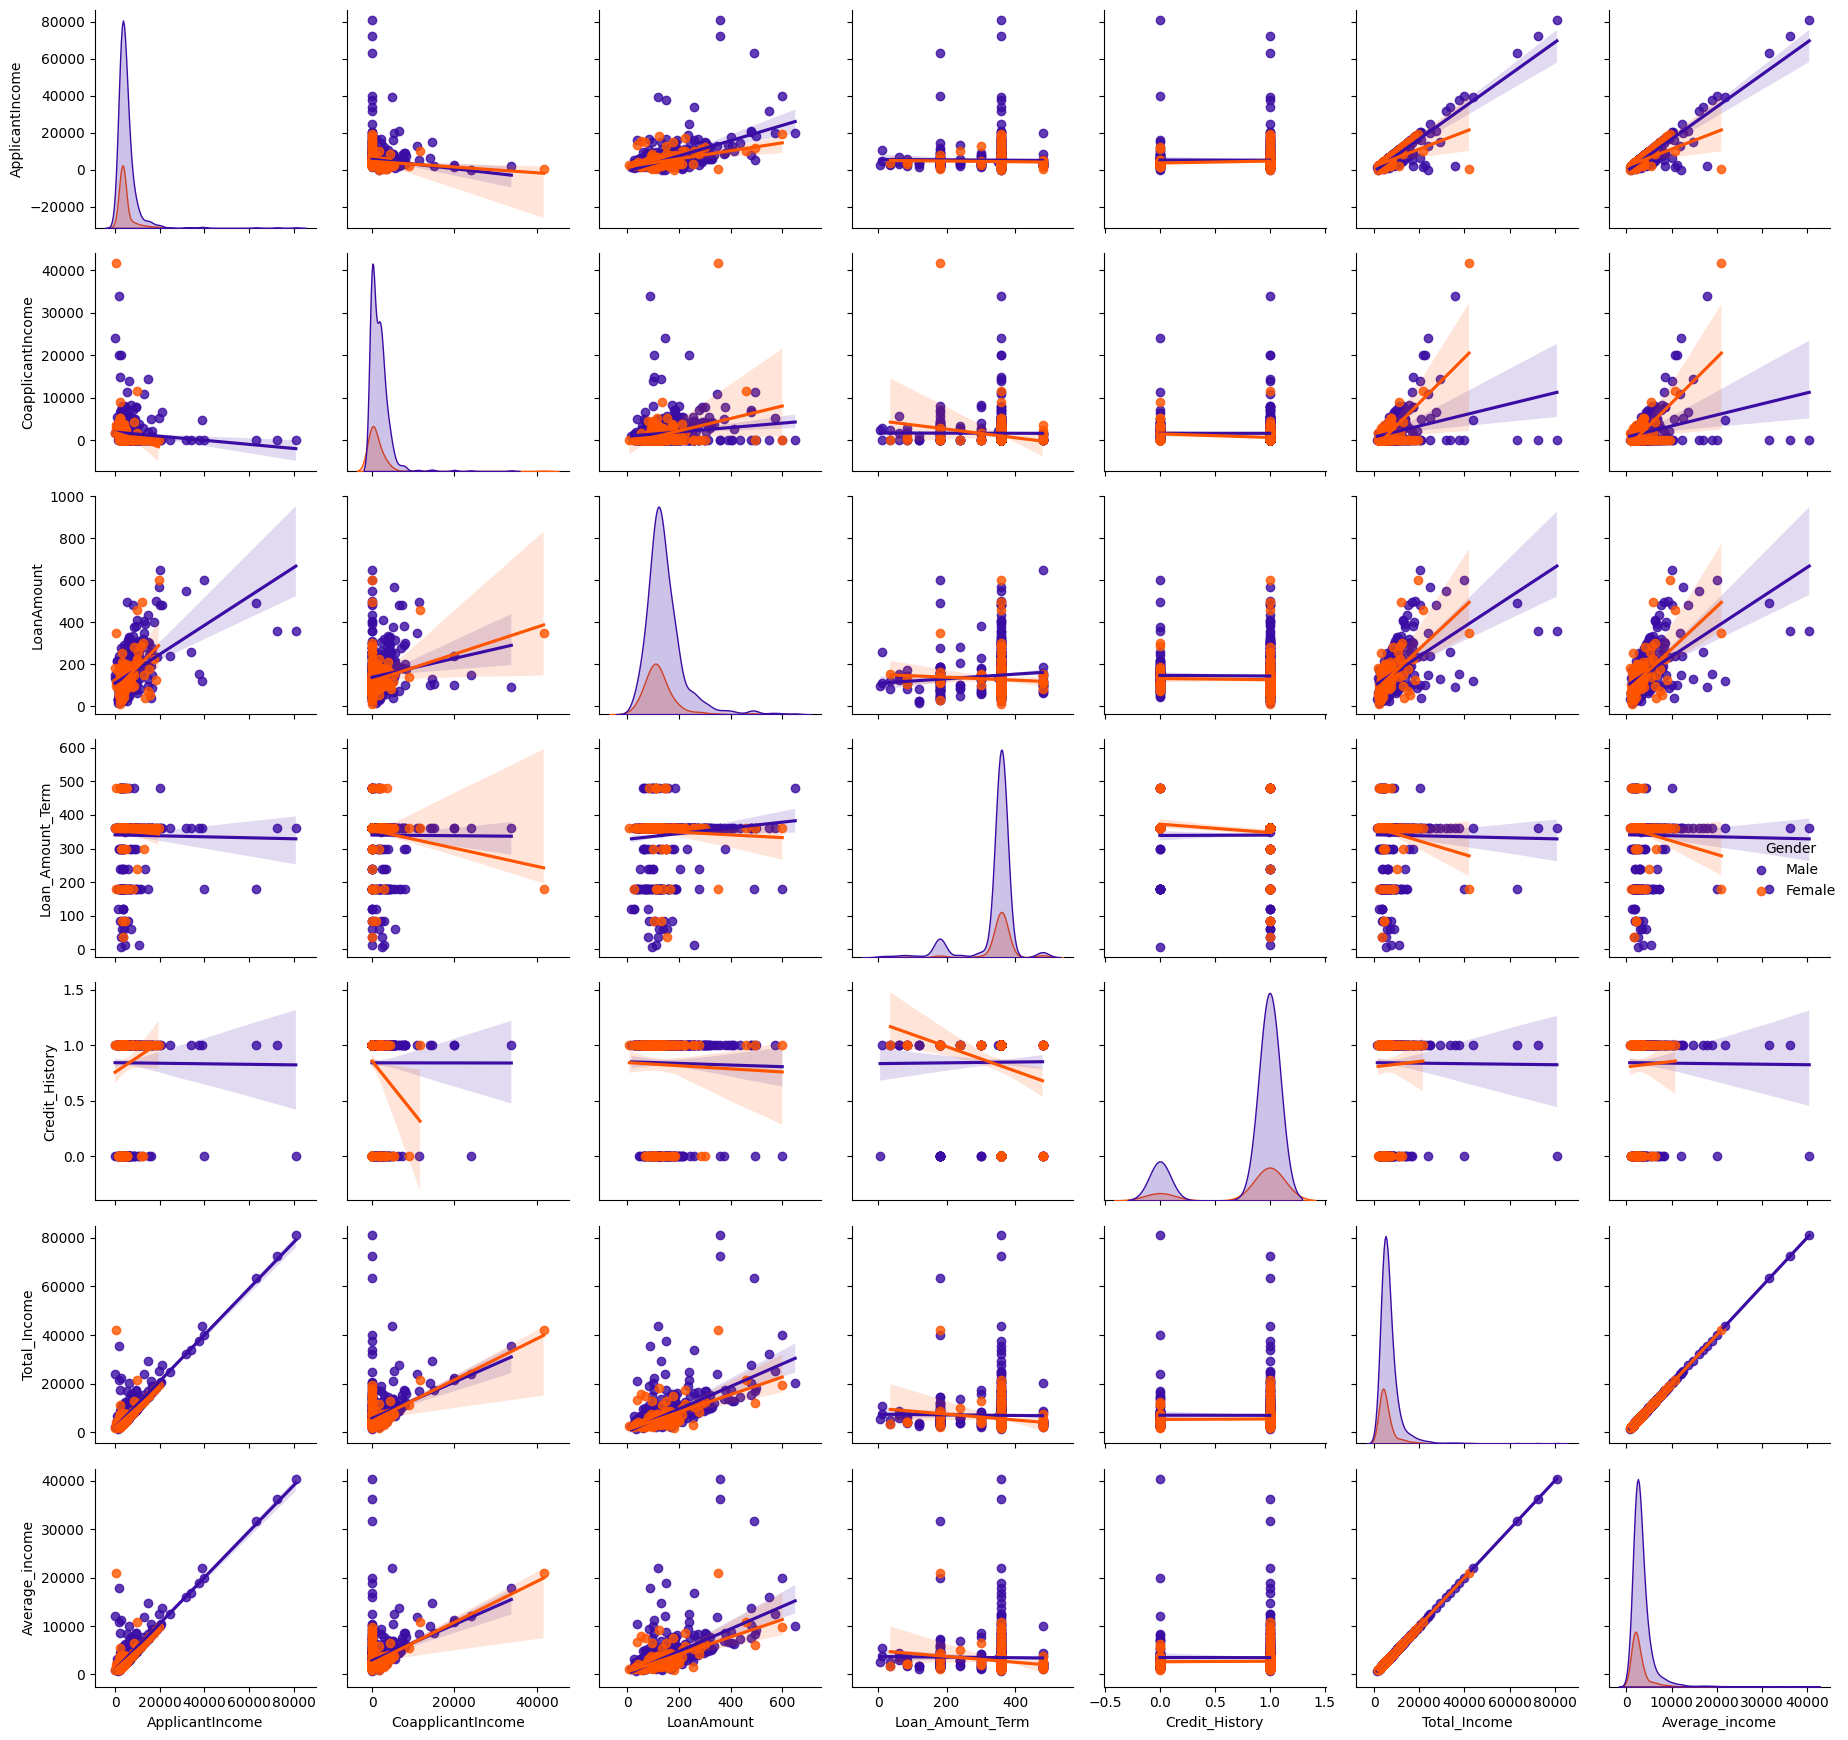

In [ ]:
sns.pairplot(df,hue="Gender",kind="reg",palette=["#3a0ca3","#ff5400"])
plt.grid()
plt.tight_layout()
plt.show()

**Now let us see the distribution of the ApplicantIncome, CoapplicantIncome, LoanAmount**

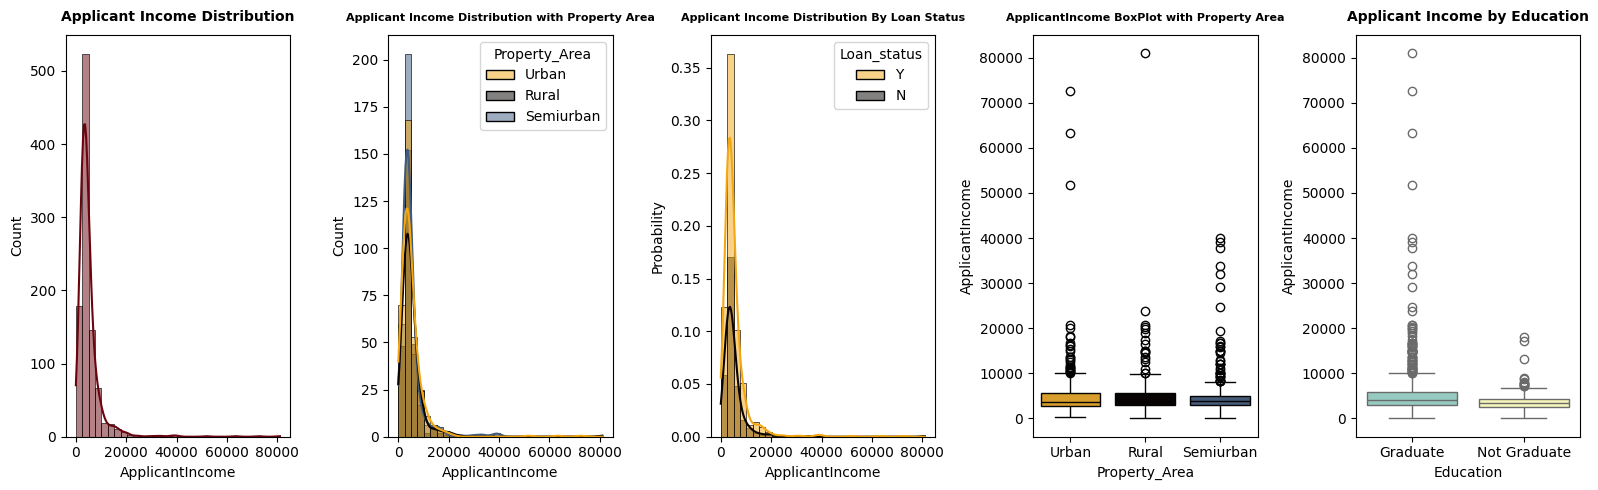

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,5,1)
plt.title("Applicant Income Distribution", fontweight="bold",size=10,pad=10)
sns.histplot(x="ApplicantIncome",data=df,color="#6a040f",bins=32,kde=True)

plt.subplot(1,5,2)
sns.histplot(x="ApplicantIncome",data=df,bins=32,kde=True,hue="Property_Area",palette=["#F3A712","#090302","#3d5a80"])
plt.title("Applicant Income Distribution with Property Area", fontweight="bold", size=8, pad=10)

plt.subplot(1,5,3)
sns.histplot(x="ApplicantIncome",data=df,bins=32,kde=True,stat="probability",hue="Loan_status",palette=["#F3A712","#090302","#3d5a80"])
plt.title("Applicant Income Distribution By Loan Status", fontweight="bold", size=8, pad=10)

plt.subplot(1,5,4)
sns.boxplot(x="Property_Area",y="ApplicantIncome",data=df, palette=["#F3A712","#090302","#3d5a80"])
plt.title("ApplicantIncome BoxPlot with Property Area",fontweight="bold", size=8, pad=10)

plt.subplot(1,5,5)
sns.boxplot(x='Education', y='ApplicantIncome', data=df, palette="Set3")
plt.title('Applicant Income by Education',fontweight="bold",size=10,pad=10)

plt.tight_layout()
plt.show()

**1.From this we can observe that the data of Applicant Income is right skewed**

**2.we can also see  that there are many outliers in the ApplicantIncome Column which attributed the income inequality**

**3. Here We can see that if the Applicant Income is High then the chance of getting the loan approved is higher**

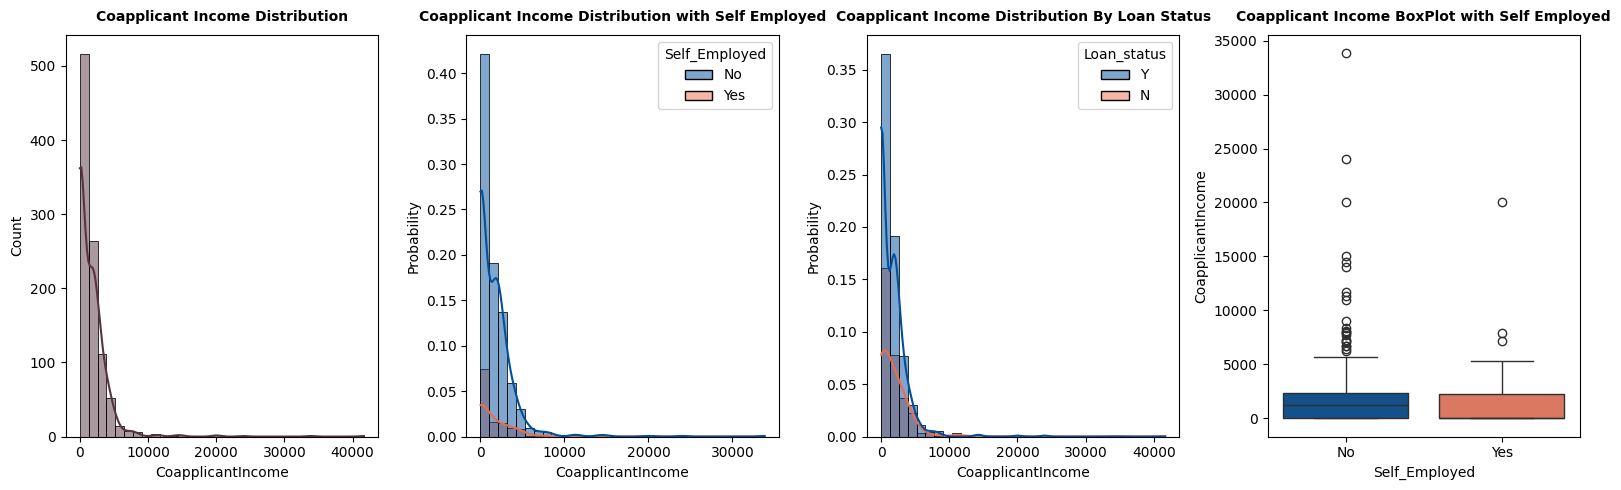

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,4,1)
plt.title("Coapplicant Income Distribution", fontweight="bold",size=10,pad=10)
sns.histplot(x="CoapplicantIncome",data=df,color="#563440",bins=32,kde=True)

plt.subplot(1,4,2)
sns.histplot(x="CoapplicantIncome",data=df,bins=32,kde=True,stat="probability",hue="Self_Employed",palette=["#00509d","#ee6c4d"])
plt.title("Coapplicant Income Distribution with Self Employed", fontweight="bold", size=10, pad=10)

plt.subplot(1,4,3)
sns.histplot(x="CoapplicantIncome",data=df,bins=32,kde=True,stat="probability",hue="Loan_status",palette=["#00509d","#ee6c4d"])
plt.title("Coapplicant Income Distribution By Loan Status", fontweight="bold", size=10, pad=10)

plt.subplot(1,4,4)
sns.boxplot(x="Self_Employed",y="CoapplicantIncome",data=df, palette=["#00509d","#ee6c4d"])
plt.title("Coapplicant Income BoxPlot with Self Employed",fontweight="bold", size=10, pad=10)
plt.tight_layout()

plt.show()

**1.Just like Applicant Income the coapplicant income distribution is also right skewed**

**2.Here also there are many outliers**

**3.The Chance of getting the Loan Approved is higher for those who have Coapplicant Income is higher**

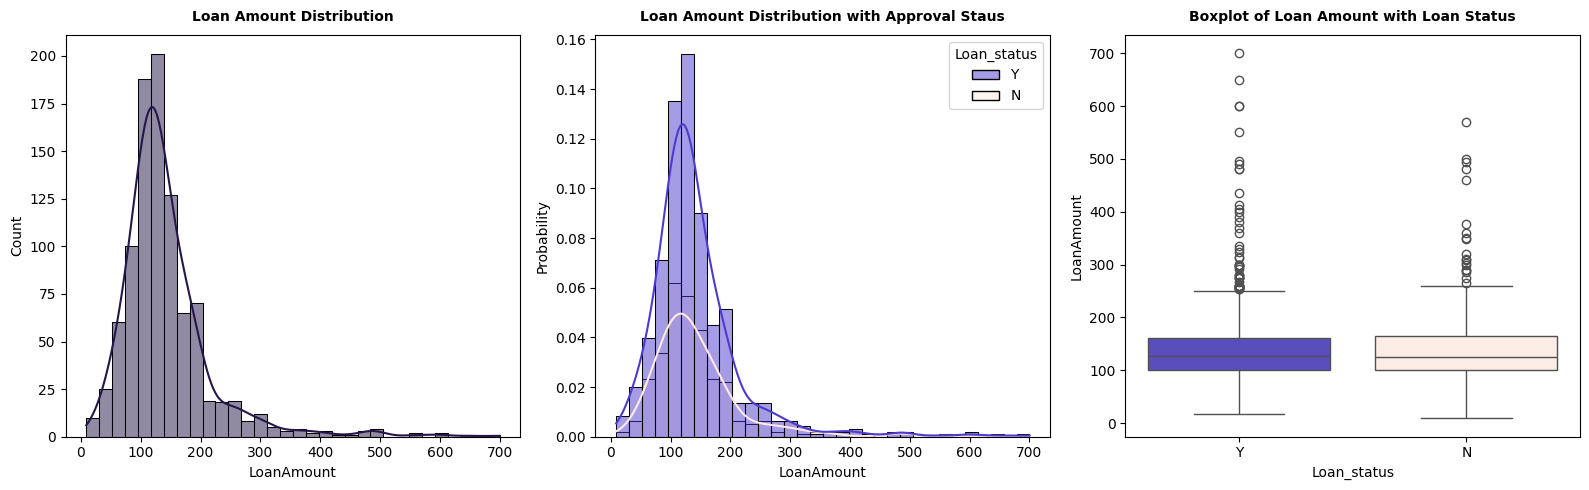

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.title("Loan Amount Distribution", fontweight="bold",size=10,pad=10)
sns.histplot(x="LoanAmount",data=df,color="#251749",bins=32,kde=True)

plt.subplot(1,3,2)
plt.title("Loan Amount Distribution with Approval Staus", fontweight="bold", size=10, pad=10)
sns.histplot(x="LoanAmount",data=df,bins=32,kde=True,stat="probability",hue="Loan_status",palette=["#4C3BCF","#FFEAE3"])

plt.subplot(1,3,3)
plt.title("Boxplot of Loan Amount with Loan Status", fontweight="bold",size=10,pad=10)
sns.boxplot(x="Loan_status", y="LoanAmount", data =df,palette=["#4C3BCF","#FFEAE3"])
plt.tight_layout()

plt.show()

**Observations:**


*   Here we can see that the distribution of Loan amount is sort of Normal Distribution
*   But there are also many outliers which need to be solved by using transformation

*   Another thing To Note is that if the Loan Amount is small Then chance of getting the Loan approved is higher



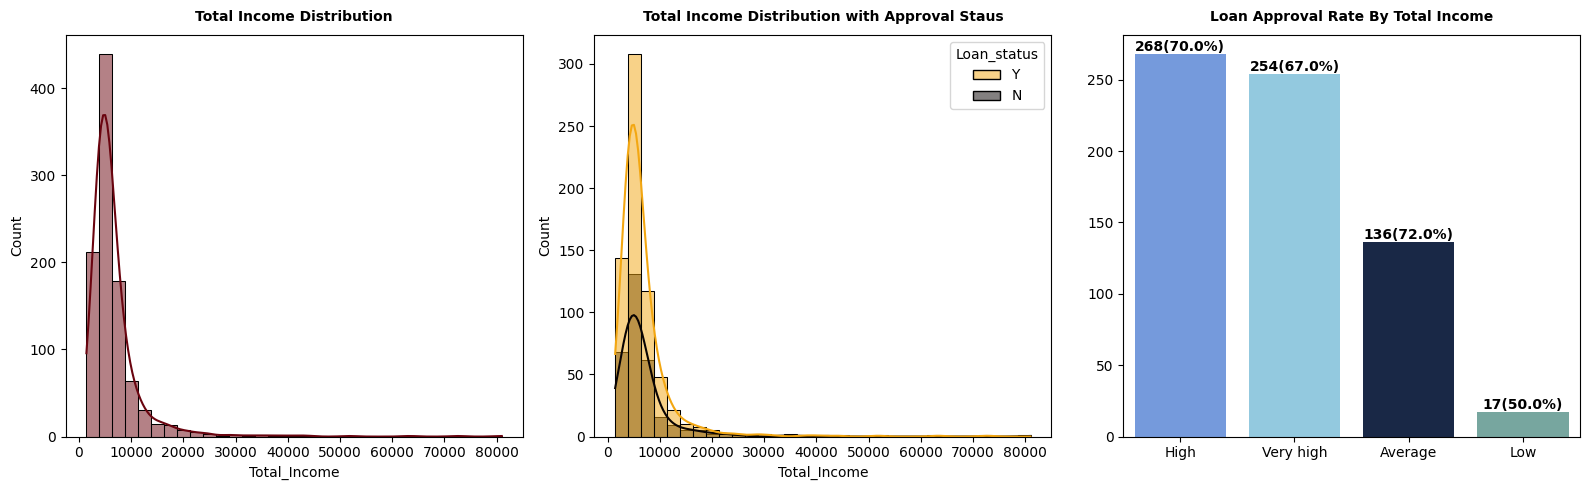

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.title("Total Income Distribution", fontweight="bold",size=10,pad=10)
sns.histplot(x="Total_Income",data=df,color="#6a040f",bins=32,kde=True)

plt.subplot(1,3,2)
sns.histplot(x="Total_Income",data=df,bins=32,kde=True,hue="Loan_status",palette=["#F3A712","#090302"])
plt.title("Total Income Distribution with Approval Staus", fontweight="bold", size=10, pad=10)

plt.subplot(1,3,3)
bin=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
new_df=df.copy()
new_df['Total_Income_bin']=pd.cut(new_df['Total_Income'],bins=bin,labels=group)


approve_df=new_df[new_df["Loan_status"]=="Y"]
total_income_value_Approve=approve_df["Total_Income_bin"].value_counts()
actual_total_income_value=new_df["Total_Income_bin"].value_counts()
approval_rate=np.floor((total_income_value_Approve/actual_total_income_value)*100).values
sns.barplot(x=total_income_value_Approve.index.tolist(),y=total_income_value_Approve.values,palette=['#6495ED', '#87CEEB', "#11264e","#6faea4"])
plt.title("Loan Approval Rate By Total Income",fontweight="bold",size=10,pad=10)
for i,v in enumerate(total_income_value_Approve.values):
  plt.text(i,v,str(v)+"("+str(approval_rate[i])+"%)",ha="center",va="bottom",fontweight="heavy",size=10)

plt.tight_layout()

plt.show()

**Observation:**
* The distribution of Total income is also right skewed
* More The Income More The cahnce of getting the loan approved

**Now we will analyze the Loan Approval Rate with respect to the column Property Area**

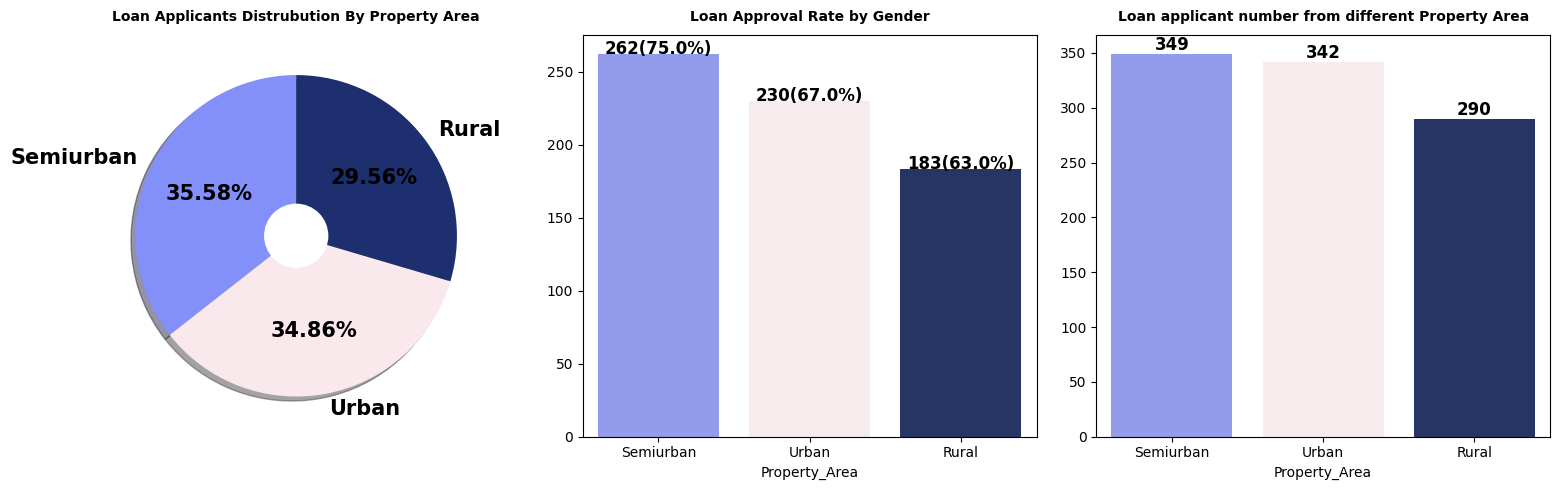

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.title("Loan Applicants Distrubution By Property Area", fontweight="heavy", size=10, pad=10)
plt.pie(df["Property_Area"].value_counts(),labels=df["Property_Area"].value_counts().index, autopct="%.2f%%",textprops={"fontweight":"heavy","size":15},shadow=True,colors=["#8390FA","#F9E9EC","#1D2F6F"],startangle=90)
center_small_circle=plt.Circle((0,0),0.2,fc="white")
fig=plt.gcf()
fig.gca().add_artist(center_small_circle)

plt.subplot(1,3,2)
plt.title("Loan Approval Rate by Gender",fontweight="heavy", size=10,pad=10)
approve_df=df[df["Loan_status"]=="Y"]
property_value_Approve=approve_df["Property_Area"].value_counts()
actual_property_value=df["Property_Area"].value_counts()
approval_rate=np.floor((property_value_Approve/actual_property_value)*100).values
sns.barplot(x=property_value_Approve.index,y=property_value_Approve.values,palette=["#8390FA","#F9E9EC","#1D2F6F"])
for i,v in enumerate(property_value_Approve.values):
  plt.text(i,v,str(v)+"("+str(approval_rate[i])+"%)",ha="center",fontweight="heavy",size=12)

plt.subplot(1,3,3)
plt.title("Loan applicant number from different Property Area",fontweight="heavy", size=10,pad=10)
sns.barplot(x=df["Property_Area"].value_counts().index,y=df["Property_Area"].value_counts().values,palette=["#8390FA","#F9E9EC","#1D2F6F"])
for i,v in enumerate(df["Property_Area"].value_counts().values):
  plt.text(i,v,str(v),ha="center",va="bottom",fontweight="heavy",size=12)

plt.tight_layout()
plt.show()

**Observations:**

**1. we can see that the loan approval rate of semiurban area people is higher than Urban area and rural Area People**

**2. The Number of loan applicants from semi urbban area is also higher than urban and rural area**

Now let us the relation between loan amount and Applicant Income

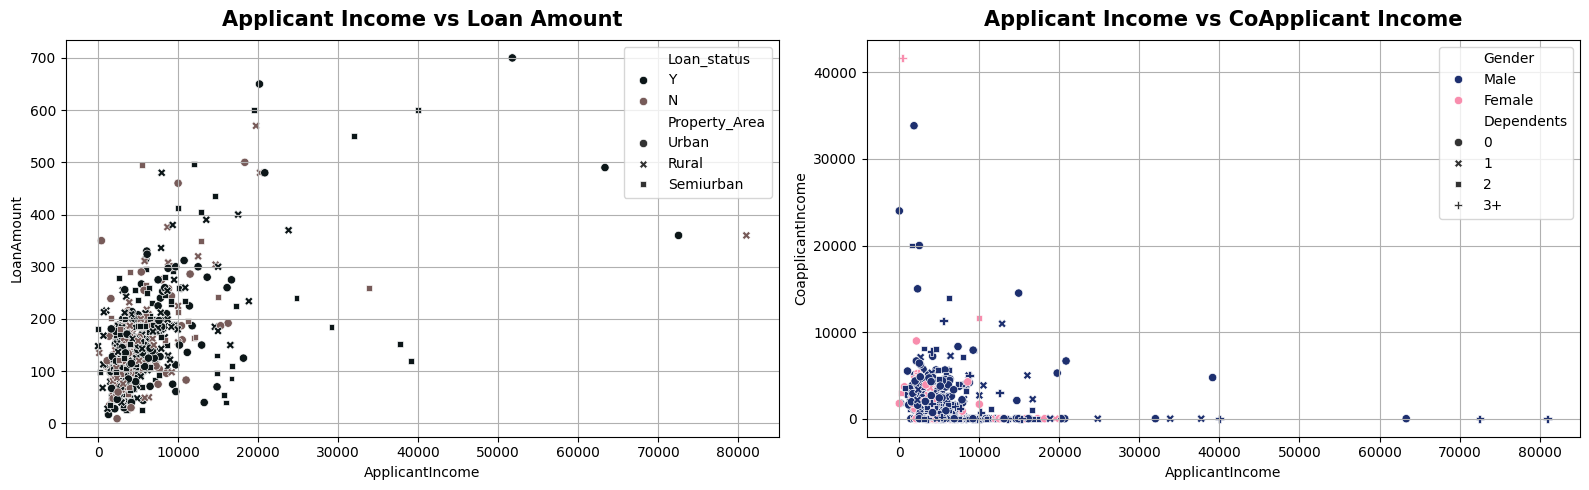

In [ ]:
fig=plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.title("Applicant Income vs Loan Amount", fontweight="black",size=15,pad=10)
sns.scatterplot(x="ApplicantIncome", y="LoanAmount", data=df,hue="Loan_status", style="Property_Area",palette=["#0C1618","#775B59"])
plt.grid()

plt.subplot(1,2,2)

plt.title("Applicant Income vs CoApplicant Income", fontweight="black",size=15,pad=10)
sns.scatterplot(x="ApplicantIncome", y="CoapplicantIncome",data =df,hue="Gender",style="Dependents",palette=["#1D2F6F","#F88DAD"])

plt.grid()

plt.tight_layout()
plt.show()

**Observations:**

we can see that there is a sort of Linear relation between Applicant Income and Loan Amount

Now let us see the relation between Average Income with Genders

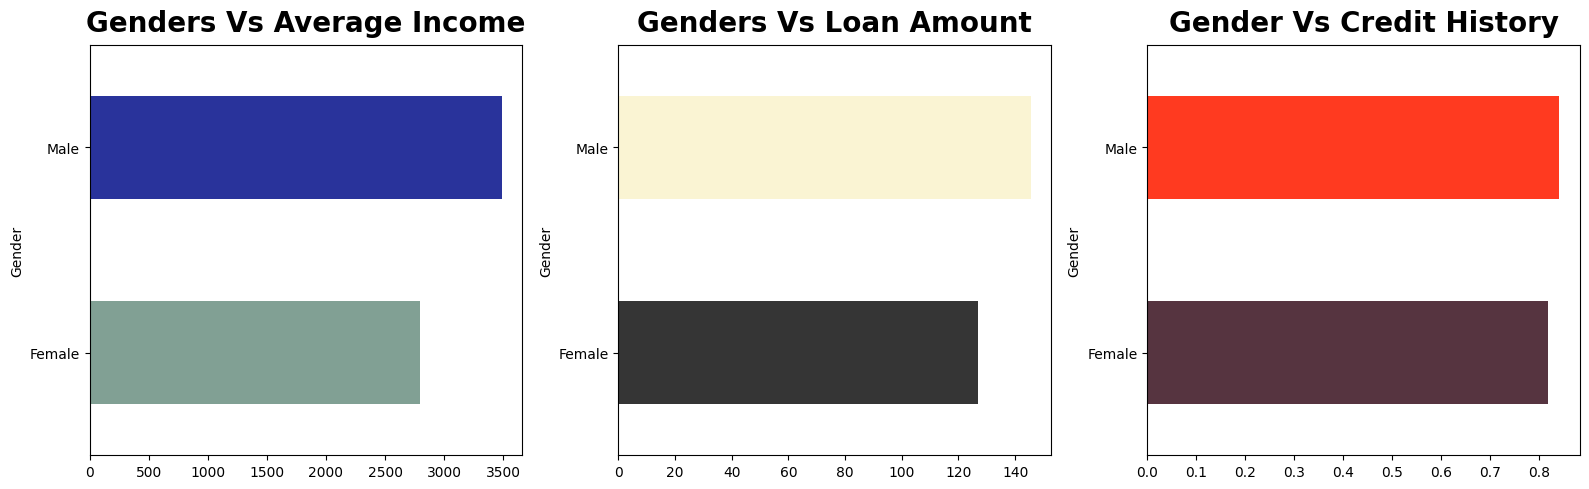

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.title("Genders Vs Average Income",fontweight="heavy",size=20,pad=10)
grouped_gender_1=df.groupby("Gender")["Average_income"].mean()
grouped_gender_1.plot(kind='barh', ax=plt.gca(), color=[ "#81A094", "#29339B"])


plt.subplot(1,3,2)
plt.title("Genders Vs Loan Amount",fontweight="heavy",size=20,pad=10)
grouped_gender_2=df.groupby("Gender")["LoanAmount"].mean()
grouped_gender_2.plot(kind='barh', ax=plt.gca(), color=["#353535", "#FAF4D3"])

plt.subplot(1,3,3)
plt.title("Gender Vs Credit History", fontweight="heavy", size=20, pad=10)
grouped_gender_3=df.groupby("Gender")["Credit_History"].mean()
grouped_gender_3.plot(kind='barh', ax=plt.gca(), color=["#563440", "#FF3A20"])

plt.tight_layout()
plt.show()

**Observations**

1.Male **Outperformed** Female in terms of **Average Income**


2. The **average Loan Amount** of **Males** is also comaparatively **higher** than the **average Loan amount** of **Females**

Now let us see the Loan Approval rate with dependents

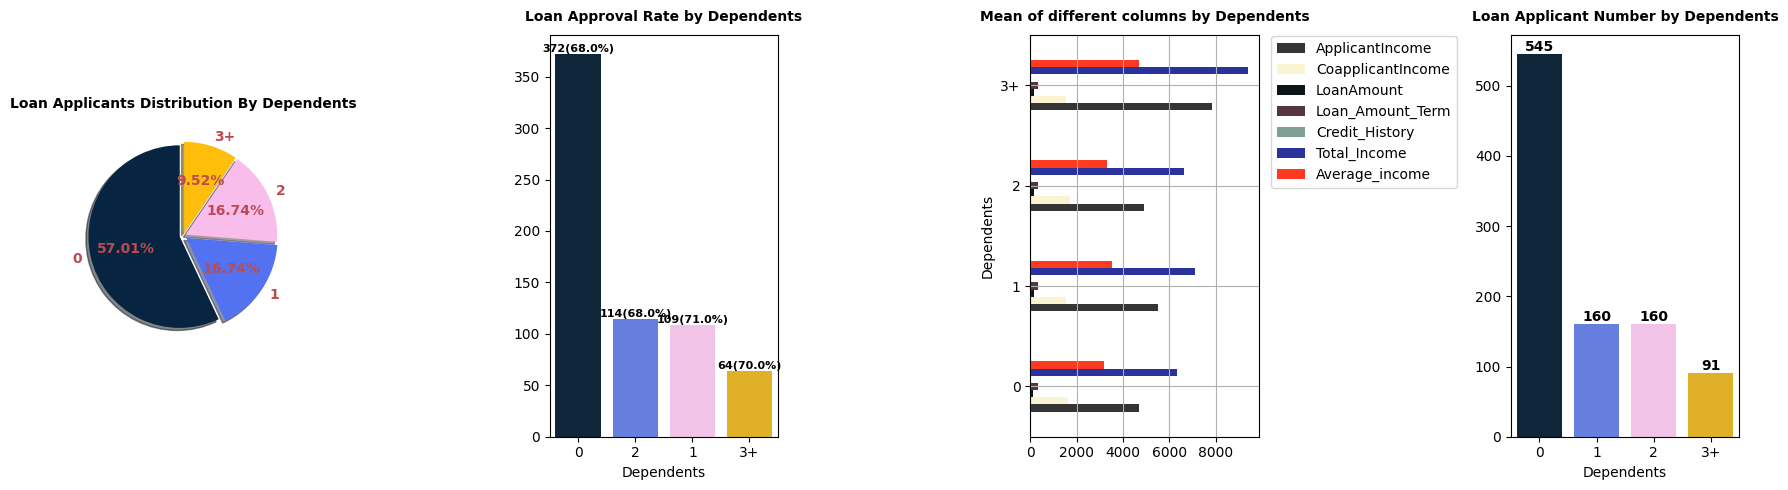

In [ ]:
plt.figure(figsize=(17,5))
plt.subplot(1,4,1)
plt.title("Loan Applicants Distribution By Dependents", fontweight="heavy", size=10,pad=10)
plt.pie(df["Dependents"].value_counts(),labels=df["Dependents"].value_counts().index,autopct="%.2f%%",textprops={"fontweight":"heavy","size":10,"color":"#bc4b51"},shadow=True,startangle=90,explode=[0.04,0.04,0.03,0.03],colors=["#072541","#5272F2","#F8BDEB","#ffbe0b"])

plt.subplot(1,4,2)
plt.title("Loan Approval Rate by Dependents",fontweight="heavy", size=10,pad=10)

dependents_approve=df[df["Loan_status"]=="Y"]["Dependents"].value_counts()
actual_dependents=df["Dependents"].value_counts()
approval_rate_dependents=np.floor((dependents_approve/actual_dependents)*100).values
sns.barplot(x=dependents_approve.index,y=dependents_approve.values,palette=["#072541","#5272F2","#F8BDEB","#ffbe0b"])
for i,v in enumerate(dependents_approve.values):
  plt.text(i,v,str(v)+"("+str(approval_rate_dependents[i])+"%)",ha="center",va="bottom",fontweight="heavy",size=8)

plt.subplot(1, 4, 3)
plt.title("Mean of different columns by Dependents", fontweight="heavy", size=10, pad=10)
Num_features = df.select_dtypes(include=["int64", "float64"]).columns
grouped_means = df.groupby('Dependents')[Num_features].mean()
grouped_means.plot(kind='barh', ax=plt.gca(), color=["#353535", "#FAF4D3", "#0C1618", "#563440", "#81A094", "#29339B", "#FF3A20"])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
plt.grid()

plt.subplot(1,4,4)
plt.title("Loan Applicant Number by Dependents",fontweight="heavy", size=10,pad=10)
sns.barplot(x=df["Dependents"].value_counts().index,y=df["Dependents"].value_counts().values,palette=["#072541","#5272F2","#F8BDEB","#ffbe0b"])

for i,v in enumerate(df["Dependents"].value_counts().values):
  plt.text(i,v,str(v),ha="center",va="bottom",fontweight="heavy",size=10)

plt.tight_layout()

plt.show()


**Observations:


*   Those Loan Applicants who have Dependents More than 3 has the Most Income
*   Those Loan Applicants who have 1 dependent has Most Loan Approval Rate
*   Those Who Have No dependents are the Most who have applied for loan


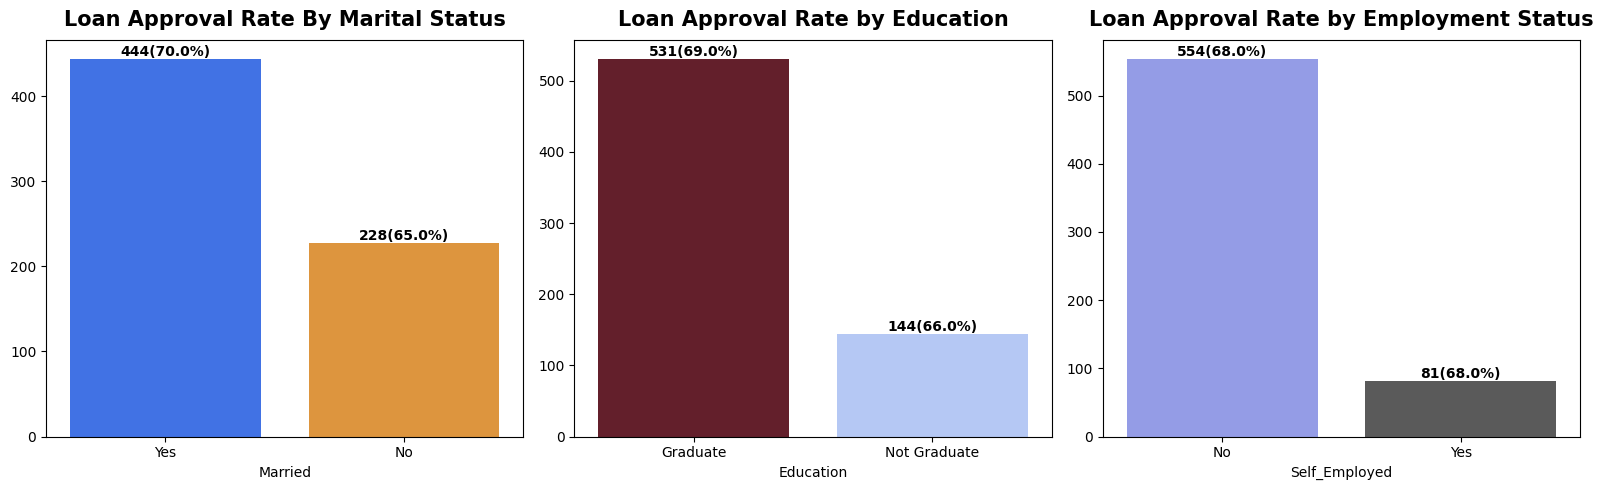

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
approve_df=df[df["Loan_status"]=="Y"]
married_approve=approve_df["Married"].value_counts()
married_value=df["Married"].value_counts()
married_rate=np.floor((married_approve/married_value)*100).values
sns.barplot(x=married_approve.index,y=married_approve.values,palette=["#2667ff","#f79824"])
plt.title("Loan Approval Rate By Marital Status",fontweight="heavy",size=15,pad=10)
for i,v in enumerate(married_approve.values):
  plt.text(i,v,str(v)+"("+str(married_rate[i])+"%)",ha="center",va="bottom",fontweight="heavy",size=10)

plt.subplot(1,3,2)
education_approve=approve_df["Education"].value_counts()
education_value=df["Education"].value_counts()
education_rate=np.floor((education_approve/education_value)*100).values
sns.barplot(x=education_approve.index,y=education_approve.values,palette=["#6e1423","#abc4ff"])
plt.title("Loan Approval Rate by Education",fontweight="heavy",size=15,pad=10)
for i,v in enumerate(education_approve.values):
  plt.text(i,v,str(v)+"("+str(education_rate[i])+"%)",ha="center",va="bottom",fontweight="heavy",size=10)

plt.subplot(1,3,3)
employment_approve=approve_df["Self_Employed"].value_counts()
employment_value=df["Self_Employed"].value_counts()
employment_rate=np.floor((employment_approve/employment_value)*100).values
sns.barplot(x=employment_approve.index,y=employment_approve.values,palette=["#8691f4","#5a5a5a"])
plt.title("Loan Approval Rate by Employment Status",fontweight="heavy",size=15,pad=10)
for i,v in enumerate(employment_approve.values):
  plt.text(i,v,str(v)+"("+str(employment_rate[i])+"%)",ha="center",va="bottom",fontweight="heavy",size=10)


plt.tight_layout()
plt.show()

*

Now let us see the correlation between any Numeriocal Columns two columns


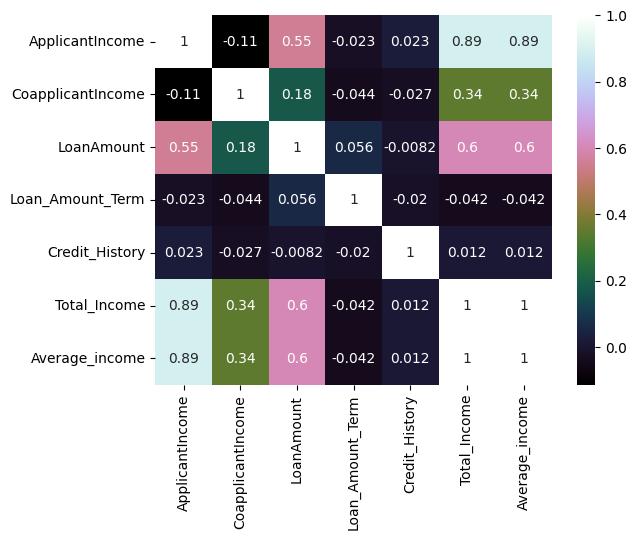

In [ ]:
Num_features=df.select_dtypes(include=["int64","float64"]).columns
x=df[Num_features].corr()
sns.heatmap(x,annot=True,cmap="cubehelix")

plt.show()

Now let us start our Data Preprocessing and Model building

In [30]:
col=["Total_Income","Average_income"]
df.drop(columns=col, inplace =True)


In [31]:
!pip install xgboost

In [32]:
!pip install lightgbm

In [33]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder,OrdinalEncoder,MinMaxScaler,FunctionTransformer
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn import set_config
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,precision_score,recall_score,f1_score,make_scorer
from sklearn.ensemble import StackingClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

In [34]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


Now as our Column Applicant Imcome, Co-Applicant Income And Loan Amount has a lot outliers, So we first remove the outliers

Here I do Capping

In [35]:
def removing_outLiers_IQR(df,col):
  Q1=df[col].quantile(0.25)
  Q2=df[col].quantile(0.75)
  IQR=Q2-Q1
  MINI=Q1-1.5*IQR
  MAXI=Q2+1.5*IQR
  df[col]=np.where(df[col]<MINI,MINI,np.where(df[col]>MAXI,MAXI,df[col]))

  return df


In [36]:
Outier_col=["ApplicantIncome","CoapplicantIncome","LoanAmount"]
for col in Outier_col:
  df=removing_outLiers_IQR(df,col)

In [37]:
print(df["ApplicantIncome"].skew())
print(df["CoapplicantIncome"].skew())
print(df["LoanAmount"].skew())

0.9627084934816618
0.9950183505692877
0.6227253347383991


**Now Let Us Do Train test Split**

In [38]:
X=df.drop(columns=["Loan_status"])
y=df["Loan_status"]

* Now as the above Three Columns **Applicant Income, Coapplicant Income, Loan Amount** Are Right skew we will apply Log Transformation on those columns

* Then we will impute the columns with simple Imputer using Mean strategy

* Then we will scale the columns using standard scaling

In [39]:
Log_Simple_Imputer_Standard_scaler_NUM_col=["ApplicantIncome","CoapplicantIncome","LoanAmount"]

trf1=Pipeline(
    steps=[
        # ("Log Transformation",FunctionTransformer(func=np.log1p)),
        ("Simple Imputer",SimpleImputer(strategy="median")),
        ("Standard Scaler",StandardScaler())
    ]
)

Imputation + encoding Transformer

And Inputation + Scaling Transformer

We can See that There are Missing Values in Married, Gender, Dependents,SElf_employed, Loan Amount, Loan Amount Term
Credit History

* We apply Most frequent Categorical Imputer in Married and Gender and dependets, Self_employed

* We will Apply Mean Simple Imputer For  Loan Amount Term as there are Missing Values < 5% and also will do Standard scaling

* Now we will use first KNN Imputer For Credit History, Then we will see what to do

* Then we will apply ordinal encoding on Dependents, Self_employed, Education,
Property_Area

* And also we will apply one Hot encoder on on married and Gender

* Now as there is a relation between the classes of the categorical columns Education, Self_Employed, Dependents and Property Area We will do ordinal encoding


In [40]:
Simple_Imputer_Scaler_NUM_col=["Loan_Amount_Term"]

trf2=Pipeline(
    steps=[
        ("Simple Imputer",SimpleImputer(strategy="median")),
        ("Standard Scaler",StandardScaler())
    ]
)

KNN_Imputer_NUM_col=["Credit_History"]

trf3=Pipeline(
    steps=[
        ("KNN Imputer",KNNImputer(n_neighbors=5,weights="distance"))
    ]
)

Simple_Imputer_ordinal_CAT_col=["Dependents","Property_Area","Education"]

trf4=Pipeline(
    steps=[
        ("Simple Imputer",SimpleImputer(strategy="most_frequent")),
        ("Ordinal Encoder",OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
    ]
)

Simple_Imputer_One_Hot_Encoder_CAT_col=["Gender","Married","Self_Employed"]

trf5=Pipeline(
    steps=[
        ("Simple Imputer",SimpleImputer(strategy="most_frequent")),
        ("One Hot Encoder",OneHotEncoder(sparse=False, drop="first",handle_unknown="ignore"))

    ]

)



We will Do Label encoding For the output Column
* Loan Status


Now we can Make Our final ColumnTransformer that we will use for making our pipeline

In [41]:
set_config(display="diagram")


In [43]:
final_preprocessor=ColumnTransformer(
    transformers=[
        ("Log transform + Simple Imputer + Standard Scaling",trf1,Log_Simple_Imputer_Standard_scaler_NUM_col),
        ("Simple imputer + Standard Scaling ",trf2,Simple_Imputer_Scaler_NUM_col),
        ("KNN Imputer",trf3,KNN_Imputer_NUM_col),
        ("Simple imputer + Ordinal Encoder",trf4,Simple_Imputer_ordinal_CAT_col),
        ("Simple imputer + One Hot Encoder",trf5,Simple_Imputer_One_Hot_Encoder_CAT_col)
    ]
)

**Now Let's start our Model Training**

The list of all models that we will evaluate:

In [44]:
classifiers = {
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "DecisionTree": DecisionTreeClassifier(max_depth=5),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "LightGBM": LGBMClassifier()
}

The List of parameters for respective Models:

In [45]:
param_grids = {
    "RandomForest": {
        'classifier__criterion': ["gini", "entropy", "log_loss"],
        'classifier__n_estimators': [25,50, 75,100,120],
        "classifier__max_features":[0.25,0.5,0.75,1.0],
        'classifier__max_depth': [None, 6, 10, 15],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    "GradientBoosting": {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [2, 3, 4, 5],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    },
    "DecisionTree": {
        'classifier__max_depth': [2, 3, 4, 5, 10],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    "LogisticRegression": {
        'classifier__solver': ['saga'],
        'classifier__penalty': ['elasticnet'],
        'classifier__l1_ratio': [0.25, 0.5, 0.55, 0.6, 0.70, 0.75],
        'classifier__C': [0.01, 0.1, 0.5, 0.7, 1.0, 3.0],
        'classifier__max_iter': [60, 100, 400, 700, 1000]
    },
    "XGBoost": {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 4, 5, 6],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    },
    "KNN": {
        'classifier__n_neighbors': [3, 4, 5, 6, 7],
        'classifier__weights': ['uniform', 'distance']
    },
    "SVC": {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__gamma': [0.001, 0.01, 0.1, 1],
        'classifier__kernel': ['linear', 'rbf', 'poly']
    },
    "LightGBM": {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 4, 5, 6],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    }
}

Now the Function To evaluate all of our Model

In [46]:
def evaluate_models(classifiers, param_grids, final_preprocessor, X_train, y_train, X_test, y_test,X,y):
    results = {}
    for name, classifier in classifiers.items():
        pipe = Pipeline(
            steps=[("preprocessor", final_preprocessor), ("classifier", classifier)]
        )

        param_grid = param_grids[name]
        grid_search = GridSearchCV(pipe, param_grid, cv=4, scoring='accuracy', n_jobs=-1)


        grid_search.fit(X_train, y_train)
        y_pred = grid_search.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        acc_cv_score = cross_val_score(grid_search.best_estimator_, X, y, cv=4,  n_jobs=-1,scoring='accuracy').mean()

        precision = precision_score(y_test, y_pred, average='binary')
        precision_cv = cross_val_score(grid_search.best_estimator_,X, y, cv=4,  n_jobs=-1,scoring=make_scorer(precision_score, average='binary')).mean()

        recall = recall_score(y_test, y_pred, average='binary')
        recall_cv = cross_val_score(grid_search.best_estimator_, X, y, cv=4,  n_jobs=-1,scoring=make_scorer(recall_score, average='binary')).mean()

        f1 = f1_score(y_test, y_pred, average='binary')
        f1_cv = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring=make_scorer(f1_score, average='binary')).mean()

        results[name] = {
            "accuracy": accuracy,
            "cv_score": acc_cv_score,
            "precision": precision,
            "precision_cv": precision_cv,
            "recall": recall,
            "recall_cv": recall_cv,
            # "f1_score": f1,
            # "f1_score_cv": f1_cv,
            "best_params": grid_search.best_params_
        }
 
        print(f"{name} - Accuracy: {accuracy:.3f}, CV Score: {acc_cv_score:.3f}, Precision: {precision:.3f},Precision_cv: {precision_cv:.3f}, Recall: {recall:.3f}, Recall_cv: {recall_cv:.3f},F1 Score: {f1:.3f},F1 Score_cv: {f1_cv:.3f}, Best Params: {grid_search.best_params_}")
    return results

**Random OverSampling**

Now first Let us sample our train data By RandomOversampling

In [47]:
X_train,X_test, Y_train,Y_test= train_test_split(X,y,test_size=0.2,random_state=42)

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(random_state=32)
X_train_over,Y_train_over=oversample.fit_resample(X_train,Y_train)
y_=y

le=LabelEncoder()
le.fit(Y_train_over)
Y_train_over=le.transform(Y_train_over)
Y_test=le.transform(Y_test)
y_=le.transform(y_)

In [48]:
results_Over=evaluate_models(classifiers,param_grids,final_preprocessor,X_train_over,Y_train_over,X_test,Y_test,X,y_)

RandomForest - Accuracy: 0.706, CV Score: 0.730, Precision: 0.744,Precision_cv: 0.747, Recall: 0.866, Recall_cv: 0.886,F1 Score: 0.800,F1 Score_cv: 0.860, Best Params: {'classifier__criterion': 'entropy', 'classifier__max_depth': 15, 'classifier__max_features': 0.5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 120}
GradientBoosting - Accuracy: 0.695, CV Score: 0.685, Precision: 0.747,Precision_cv: 0.741, Recall: 0.836, Recall_cv: 0.816,F1 Score: 0.789,F1 Score_cv: 0.844, Best Params: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}
DecisionTree - Accuracy: 0.650, CV Score: 0.666, Precision: 0.741,Precision_cv: 0.736, Recall: 0.746, Recall_cv: 0.812,F1 Score: 0.743,F1 Score_cv: 0.730, Best Params: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
LogisticRegression - Accuracy: 0.736, CV Score: 0.751, Precision: 0.759,Precision_cv: 0.758,

From these result we extract Two Best Models : Random Forest And XGBoost

**Now First We are training with Best Parameters Of RandomForest to make a pipeline of RandomForest**

In [49]:
RF=RandomForestClassifier(n_estimators=120,criterion="entropy",max_depth=15,max_features=0.5)

Making the pipeline

In [103]:
pipe_Random_Forest=Pipeline(
    steps=[
        ("Preprocessor",final_preprocessor),
        ("Classifier",RF)
    ]
)

Fitting out train data with the pipe

In [104]:
pipe_Random_Forest.fit(X_train_over,Y_train_over)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('Log transform + Simple '
                                                  'Imputer + Standard Scaling',
                                                  Pipeline(steps=[('Simple '
                                                                   'Imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Standard '
                                                                   'Scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount']),
                                                 ('Simple imputer + Standard '
                                                  'Scaling ',
                                                  Pipeline(steps=[('Simple '
                                                                   'Imputer',
                                                                   Simpl...
                                                   'Education']),
                                                 ('Simple imputer + One Hot '
                                                  'Encoder',
                                                  Pipeline(steps=[('Simple '
                                                                   'Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('One Hot '
                                                                   'Encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Self_Employed'])])),
                ('Classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=15,
                                        max_features=0.5, n_estimators=120))])

Predicting through the Pipe for the test data

In [105]:
y_pred_Over_RF=pipe_Random_Forest.predict(X_test)

Now checking the output by our performance metrices

In [106]:
print("accuracy:",accuracy_score(Y_test,y_pred_Over_RF))
print("Precision:",precision_score(Y_test,y_pred_Over_RF))
print("Recall:",recall_score(Y_test,y_pred_Over_RF))
print("F1_score:",f1_score(Y_test,y_pred_Over_RF))

accuracy: 0.6903553299492385
Precision: 0.7417218543046358
Recall: 0.835820895522388
F1_score: 0.7859649122807018


In [107]:
print("classification_report:")
print(classification_report(Y_test,y_pred_Over_RF))

classification_report:
              precision    recall  f1-score   support

           0       0.52      0.38      0.44        63
           1       0.74      0.84      0.79       134

    accuracy                           0.69       197
   macro avg       0.63      0.61      0.61       197
weighted avg       0.67      0.69      0.68       197



In [108]:
pipe_Random_Forest.named_steps['Classifier'].feature_importances_



array([0.24313354, 0.14374624, 0.22040812, 0.04651193, 0.13402346,
       0.06169206, 0.04952718, 0.02331581, 0.0240152 , 0.03266046,
       0.02096599])

Now We are training with Logistic Regression

In [55]:
LR=LogisticRegression(penalty='elasticnet',l1_ratio=0.7,max_iter=60,solver='saga',C=0.1)

Making pipeLine for Logistic Regression

In [98]:
pipe_Logistic=Pipeline(
    steps=[
        ("Preprocessor",final_preprocessor),
        ("Classifier",LR)
    ]
)

In [99]:
pipe_Logistic.fit(X_train_over,Y_train_over)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('Log transform + Simple '
                                                  'Imputer + Standard Scaling',
                                                  Pipeline(steps=[('Simple '
                                                                   'Imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Standard '
                                                                   'Scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount']),
                                                 ('Simple imputer + Standard '
                                                  'Scaling ',
                                                  Pipeline(steps=[('Simple '
                                                                   'Imputer',
                                                                   Simpl...
                                                   'Education']),
                                                 ('Simple imputer + One Hot '
                                                  'Encoder',
                                                  Pipeline(steps=[('Simple '
                                                                   'Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('One Hot '
                                                                   'Encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Self_Employed'])])),
                ('Classifier',
                 LogisticRegression(C=0.1, l1_ratio=0.7, max_iter=60,
                                    penalty='elasticnet', solver='saga'))])

In [100]:
y_pred_Over_LR=pipe_Logistic.predict(X_test)

In [101]:
print("accuracy:",accuracy_score(Y_test,y_pred_Over_LR))
print("Precision:",precision_score(Y_test,y_pred_Over_LR))
print("Recall:",recall_score(Y_test,y_pred_Over_LR))
print("F1_score:",f1_score(Y_test,y_pred_Over_LR))

accuracy: 0.7360406091370558
Precision: 0.759493670886076
Recall: 0.8955223880597015
F1_score: 0.8219178082191781


In [102]:
print("classification_report:")
print(classification_report(Y_test,y_pred_Over_LR))

classification_report:
              precision    recall  f1-score   support

           0       0.64      0.40      0.49        63
           1       0.76      0.90      0.82       134

    accuracy                           0.74       197
   macro avg       0.70      0.65      0.66       197
weighted avg       0.72      0.74      0.72       197



Now Let us do the same work for XGBoost

In [61]:
XGB=XGBClassifier(learning_rate= 0.6,max_depth=6,n_estimators= 100)

In [62]:
pipe_XGB=Pipeline(
    steps=[
        ("Preprocessor",final_preprocessor),
        ("Classifier",XGB)
    ]
)

In [64]:
pipe_XGB.fit(X_train_over,Y_train_over)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('Log transform + Simple '
                                                  'Imputer + Standard Scaling',
                                                  Pipeline(steps=[('Simple '
                                                                   'Imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Standard '
                                                                   'Scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount']),
                                                 ('Simple imputer + Standard '
                                                  'Scaling ',
                                                  Pipeline(steps=[('Simple '
                                                                   'Imputer',
                                                                   Simpl...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.6,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [65]:
y_pred_Over_XGB=pipe_XGB.predict(X_test)


In [67]:
print("accuracy:",accuracy_score(Y_test,y_pred_Over_XGB))
print("Precision:",precision_score(Y_test,y_pred_Over_XGB))
print("Recall:",recall_score(Y_test,y_pred_Over_XGB))
print("F1_score:",f1_score(Y_test,y_pred_Over_XGB))

accuracy: 0.6649746192893401
Precision: 0.7328767123287672
Recall: 0.7985074626865671
F1_score: 0.7642857142857142


In [66]:
print("classification_report:")
print(classification_report(Y_test,y_pred_Over_XGB))

classification_report:
              precision    recall  f1-score   support

           0       0.47      0.38      0.42        63
           1       0.73      0.80      0.76       134

    accuracy                           0.66       197
   macro avg       0.60      0.59      0.59       197
weighted avg       0.65      0.66      0.65       197



Now we will do Random Unversampling

**Random UnderSampling**

In [70]:
from imblearn.under_sampling import RandomUnderSampler

In [71]:
x_train_under,x_test_under, y_train_under,y_test_under= train_test_split(X,y,test_size=0.2,random_state=42)
undersample = RandomUnderSampler(random_state=32)
X_train_under,Y_train_under=undersample.fit_resample(x_train_under,y_train_under)
Y_under=y

le=LabelEncoder()
le.fit(Y_train_under)
Y_train_under=le.transform(Y_train_under)
y_test_under=le.transform(y_test_under)
Y_under=le.transform(Y_under)

In [72]:
results_under=evaluate_models(classifiers,param_grids,final_preprocessor,X_train_under,Y_train_under,x_test_under,y_test_under,X,Y_under)

RandomForest - Accuracy: 0.645, CV Score: 0.613, Precision: 0.754,Precision_cv: 0.620, Recall: 0.709, Recall_cv: 0.675, Best Params: {'classifier__criterion': 'gini', 'classifier__max_depth': 15, 'classifier__max_features': 0.25, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 25}
GradientBoosting - Accuracy: 0.741, CV Score: 0.636, Precision: 0.743,Precision_cv: 0.589, Recall: 0.948, Recall_cv: 0.906, Best Params: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 2, 'classifier__n_estimators': 100}
DecisionTree - Accuracy: 0.741, CV Score: 0.640, Precision: 0.743,Precision_cv: 0.590, Recall: 0.948, Recall_cv: 0.926, Best Params: {'classifier__max_depth': 2, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
LogisticRegression - Accuracy: 0.741, CV Score: 0.650, Precision: 0.758,Precision_cv: 0.600, Recall: 0.910, Recall_cv: 0.910, Best Params: {'classifier__C': 0.1, 'classifier__l1_ratio': 0.55, 'classif

**Balanced Random Forest Classifier**

In [74]:
from imblearn.ensemble import BalancedRandomForestClassifier

brf=BalancedRandomForestClassifier()
pipe_brf=Pipeline(
    steps=[
        ("preprocessor",final_preprocessor),
        ("classifier",brf)
    ]
)

X_train_Balan,X_test_Balan, Y_train_Balan,Y_test_Balan= train_test_split(X,y,test_size=0.2,random_state=42)

le=LabelEncoder()
le.fit(Y_train_Balan)
Y_train_Balan=le.transform(Y_train_Balan)
Y_test_Balan=le.transform(Y_test_Balan)

pipe_brf.fit(X_train_Balan,Y_train_Balan)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Log transform + Simple '
                                                  'Imputer + Standard Scaling',
                                                  Pipeline(steps=[('Simple '
                                                                   'Imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Standard '
                                                                   'Scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount']),
                                                 ('Simple imputer + Standard '
                                                  'Scaling ',
                                                  Pipeline(steps=[('Simple '
                                                                   'Imputer',
                                                                   Simpl...
                                                                                  unknown_value=-1))]),
                                                  ['Dependents',
                                                   'Property_Area',
                                                   'Education']),
                                                 ('Simple imputer + One Hot '
                                                  'Encoder',
                                                  Pipeline(steps=[('Simple '
                                                                   'Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('One Hot '
                                                                   'Encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Self_Employed'])])),
                ('classifier', BalancedRandomForestClassifier())])

In [75]:
y_pred_brf=pipe_brf.predict(X_test_Balan)
print(accuracy_score(Y_test_Balan,y_pred_brf))
print(precision_score(Y_test_Balan,y_pred_brf))
print(recall_score(Y_test_Balan,y_pred_brf))

0.6446700507614214
0.7580645161290323
0.7014925373134329


In [76]:
print(classification_report(Y_test_Balan,y_pred_brf))

              precision    recall  f1-score   support

           0       0.45      0.52      0.49        63
           1       0.76      0.70      0.73       134

    accuracy                           0.64       197
   macro avg       0.61      0.61      0.61       197
weighted avg       0.66      0.64      0.65       197



Now we will do SMOTE

In [68]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
X_train_smote,X_test_smote, Y_train_smote,Y_test_smote= train_test_split(X,y,test_size=0.2,random_state=42)
Y_smote=y


le=LabelEncoder()
le.fit(Y_train_smote)
Y_train_smote=le.transform(Y_train_smote)
Y_test_smote=le.transform(Y_test_smote)
Y_smote=le.transform(Y_smote)


In [69]:
def evaluate_models_smote(classifiers, param_grids, final_preprocessor, X_train, y_train, X_test, y_test,X,y):
    results = {}
    for name, classifier in classifiers.items():
        pipe = ImbPipeline(
            [("preprocessor",final_preprocessor),
        ("Smote Sampling",SMOTE(random_state=42)),
        ("classifier",classifier)]
        )

        param_grid = param_grids[name]
        grid_search = GridSearchCV(pipe, param_grid, cv=4, scoring='accuracy', n_jobs=-1)


        grid_search.fit(X_train, y_train)
        y_pred = grid_search.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        acc_cv_score = cross_val_score(grid_search.best_estimator_, X, y, cv=4,  n_jobs=-1,scoring='accuracy').mean()

        precision = precision_score(y_test, y_pred, average='binary')
        precision_cv = cross_val_score(grid_search.best_estimator_,X, y, cv=4,  n_jobs=-1,scoring=make_scorer(precision_score, average='binary')).mean()

        recall = recall_score(y_test, y_pred, average='binary')
        recall_cv = cross_val_score(grid_search.best_estimator_, X, y, cv=4,  n_jobs=-1,scoring=make_scorer(recall_score, average='binary')).mean()

        # f1 = f1_score(y_test, y_pred, average='binary')
        # f1_cv = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring=make_scorer(f1_score, average='binary')).mean()

        results[name] = {
            "accuracy": accuracy,
            "cv_score": acc_cv_score,
            "precision": precision,
            "precision_cv": precision_cv,
            "recall": recall,
            "recall_cv": recall_cv,
            # "f1_score": f1,
            # "f1_score_cv": f1_cv,
            "best_params": grid_search.best_params_
        }
#  F1 Score: {f1:.3f},F1 Score_cv: {f1_cv:.3f},
        print(f"{name} - Accuracy: {accuracy:.3f}, CV Score: {acc_cv_score:.3f}, Precision: {precision:.3f},Precision_cv: {precision_cv:.3f}, Recall: {recall:.3f}, Recall_cv: {recall_cv:.3f}, Best Params: {grid_search.best_params_}")
    return results

In [70]:
results_smote=evaluate_models_smote(classifiers,param_grids,final_preprocessor,X_train_smote,Y_train_smote,X_test_smote,Y_test_smote,X,Y_smote)

RandomForest - Accuracy: 0.726, CV Score: 0.720, Precision: 0.741,Precision_cv: 0.758, Recall: 0.918, Recall_cv: 0.883, Best Params: {'classifier__criterion': 'entropy', 'classifier__max_depth': 6, 'classifier__max_features': 1.0, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 120}
GradientBoosting - Accuracy: 0.741, CV Score: 0.742, Precision: 0.743,Precision_cv: 0.756, Recall: 0.948, Recall_cv: 0.924, Best Params: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 50}
DecisionTree - Accuracy: 0.741, CV Score: 0.749, Precision: 0.743,Precision_cv: 0.757, Recall: 0.948, Recall_cv: 0.935, Best Params: {'classifier__max_depth': 3, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
LogisticRegression - Accuracy: 0.741, CV Score: 0.747, Precision: 0.743,Precision_cv: 0.759, Recall: 0.948, Recall_cv: 0.926, Best Params: {'classifier__C': 0.01, 'classifier__l1_ratio': 0.25, 'class

PipeLine for Decision Tree

In [71]:
DT=DecisionTreeClassifier(max_depth=3)

In [72]:
DT_pipe = ImbPipeline(
            [("preprocessor",final_preprocessor),
        ("Smote Sampling",SMOTE(random_state=42)),
        ("classifier",DecisionTreeClassifier(max_depth=3))]
        )

In [73]:
DT_pipe.fit(X_train_smote,Y_train_smote)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Log transform + Simple '
                                                  'Imputer + Standard Scaling',
                                                  Pipeline(steps=[('Simple '
                                                                   'Imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Standard '
                                                                   'Scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount']),
                                                 ('Simple imputer + Standard '
                                                  'Scaling ',
                                                  Pipeline(steps=[('Simple '
                                                                   'Imputer',
                                                                   Simpl...
                                                   'Property_Area',
                                                   'Education']),
                                                 ('Simple imputer + One Hot '
                                                  'Encoder',
                                                  Pipeline(steps=[('Simple '
                                                                   'Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('One Hot '
                                                                   'Encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Self_Employed'])])),
                ('Smote Sampling', SMOTE(random_state=42)),
                ('classifier', DecisionTreeClassifier(max_depth=3))])

In [79]:
y_pred_DT_Smote=DT_pipe.predict(X_test_smote)

In [80]:
print("Accuracy:",accuracy_score(Y_test_smote,y_pred_DT_Smote))
print("precision:",precision_score(Y_test_smote,y_pred_DT_Smote))
print("Recall:",recall_score(Y_test_smote,y_pred_DT_Smote))
print("F1_Score:",f1_score(Y_test_smote,y_pred_DT_Smote))


Accuracy: 0.7411167512690355
precision: 0.7426900584795322
Recall: 0.9477611940298507
F1_Score: 0.8327868852459017


PipeLine for Logistic Regression

In [81]:
LR_Smote=LogisticRegression(penalty='elasticnet',l1_ratio=0.25,max_iter=60,solver='saga',C=0.01)

In [86]:
LR_SMOTE_PIPE = ImbPipeline(
            [("preprocessor",final_preprocessor),
        ("Smote Sampling",SMOTE(random_state=42)),
        ("classifier",LogisticRegression(penalty='elasticnet',l1_ratio=0.25,max_iter=60,solver='saga',C=0.01))]
        )

In [87]:
LR_SMOTE_PIPE.fit(X_train_smote,Y_train_smote)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Log transform + Simple '
                                                  'Imputer + Standard Scaling',
                                                  Pipeline(steps=[('Simple '
                                                                   'Imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Standard '
                                                                   'Scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount']),
                                                 ('Simple imputer + Standard '
                                                  'Scaling ',
                                                  Pipeline(steps=[('Simple '
                                                                   'Imputer',
                                                                   Simpl...
                                                  'Encoder',
                                                  Pipeline(steps=[('Simple '
                                                                   'Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('One Hot '
                                                                   'Encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Self_Employed'])])),
                ('Smote Sampling', SMOTE(random_state=42)),
                ('classifier',
                 LogisticRegression(C=0.01, l1_ratio=0.25, max_iter=60,
                                    penalty='elasticnet', solver='saga'))])

In [88]:
y_pred_LR_SMOTE=LR_SMOTE_PIPE.predict(X_test_smote)

In [89]:
print("Accuracy:",accuracy_score(Y_test_smote,y_pred_LR_SMOTE))
print("precision:",precision_score(Y_test_smote,y_pred_LR_SMOTE))
print("Recall:",recall_score(Y_test_smote,y_pred_LR_SMOTE))
print("F1_Score:",f1_score(Y_test_smote,y_pred_LR_SMOTE))

Accuracy: 0.7411167512690355
precision: 0.7426900584795322
Recall: 0.9477611940298507
F1_Score: 0.8327868852459017


In [ ]:
print("classification_report:")
print(classification_report(Y_test,y_pred_Over_LR))

PipeLine for SVM

In [91]:
SVM=SVC(C=1,gamma=0.001,kernel='linear')


In [109]:
SVM_SMOTE_Pipe=ImbPipeline(
            [("preprocessor",final_preprocessor),
        ("Smote Sampling",SMOTE(random_state=42)),
        ("classifier",SVC(C=1,gamma=0.001,kernel='linear'))]
        )

In [110]:
SVM_SMOTE_Pipe.fit(X_train_smote,Y_train_smote)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Log transform + Simple '
                                                  'Imputer + Standard Scaling',
                                                  Pipeline(steps=[('Simple '
                                                                   'Imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Standard '
                                                                   'Scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount']),
                                                 ('Simple imputer + Standard '
                                                  'Scaling ',
                                                  Pipeline(steps=[('Simple '
                                                                   'Imputer',
                                                                   Simpl...
                                                   'Property_Area',
                                                   'Education']),
                                                 ('Simple imputer + One Hot '
                                                  'Encoder',
                                                  Pipeline(steps=[('Simple '
                                                                   'Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('One Hot '
                                                                   'Encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Self_Employed'])])),
                ('Smote Sampling', SMOTE(random_state=42)),
                ('classifier', SVC(C=1, gamma=0.001, kernel='linear'))])

In [111]:
y_pred_SVM_SMOTE=SVM_SMOTE_Pipe.predict(X_test_smote)

In [112]:
print("Accuracy:",accuracy_score(Y_test_smote,y_pred_SVM_SMOTE))
print("precision:",precision_score(Y_test_smote,y_pred_SVM_SMOTE))
print("Recall:",recall_score(Y_test_smote,y_pred_SVM_SMOTE))
print("F1_Score:",f1_score(Y_test_smote,y_pred_SVM_SMOTE))

Accuracy: 0.7411167512690355
precision: 0.7426900584795322
Recall: 0.9477611940298507
F1_Score: 0.8327868852459017


In [113]:
print("classification_report:")
print(classification_report(Y_test,y_pred_SVM_SMOTE))

classification_report:
              precision    recall  f1-score   support

           0       0.73      0.30      0.43        63
           1       0.74      0.95      0.83       134

    accuracy                           0.74       197
   macro avg       0.74      0.62      0.63       197
weighted avg       0.74      0.74      0.70       197



In [114]:
import pickle

In [115]:
pickle.dump(LR_SMOTE_PIPE,open("LogisticRegression_Smote.pkl",'wb'))

In [163]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [164]:
data = {
    'Gender': ['Male'],
    'Married': ['Yes'],
    'Dependents': ['1'],
    'Education': ['Not Graduate'],
    'Self_Employed': ['No'],
    'ApplicantIncome': [45.0],
    'CoapplicantIncome': [15.0],
    'LoanAmount': [12800.0],
    'Loan_Amount_Term': [360.0],
    'Credit_History': [0.0],
    'Property_Area': ['Rural']
}
teste = pd.DataFrame(data)


In [165]:
teste

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,1,Not Graduate,No,45.0,15.0,12800.0,360.0,0.0,Rural


In [166]:
ans=SVM_SMOTE_Pipe.predict(teste)

In [167]:
ans

array([0])